In [1]:
#importing the basic libraries
import numpy as np
import pandas as pd

In [2]:
#reading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
#checking the dataset columns
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the shape of the dataset
df.shape

(614, 13)

In [5]:
#checking the null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#dropping the missing values as we have missing values in the categorical data

df=df.dropna()

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.shape

(480, 13)

Earlier we had 614 rows and after dropping the null values we have 480 rows.

In [9]:
#label encoding

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

df.replace({'Dependents':{'3+':4}},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


#Data Visualisation

DATA VISUALISATION OF CATEGORICAL DATA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

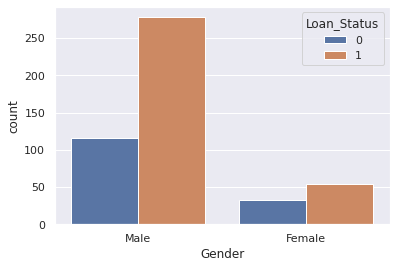

In [12]:
#relation between gender and loan_status(target value)

sns.set()
sns.countplot(x= 'Gender',hue='Loan_Status',data=df)
plt.show()

The above graph shows that male have higher chances of approved loans than females. It can be because most females are not working and loan is granted to working professional

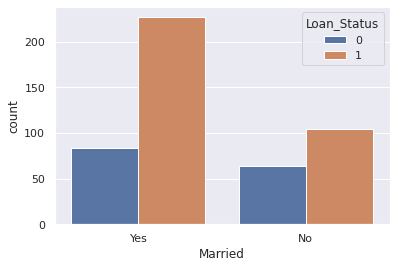

In [13]:
#relation between married  and loan_status(target value)

sns.set()
sns.countplot(x= 'Married',hue='Loan_Status',data=df)
plt.show()

Married people have higher chances of getting loans as compared to unmarried ,maybe because married people have both husband n wife to contribute to emi

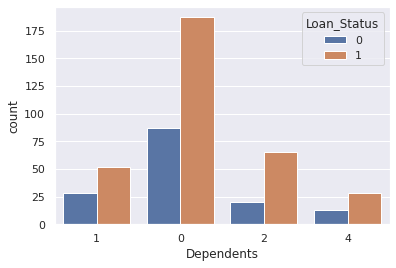

In [14]:
#relation between denpendents and loan_status(target value)

sns.set()
sns.countplot(x= 'Dependents',hue='Loan_Status',data=df)
plt.show()

Those people have 0 dependents have higher chances of approved loan as compared to people who have dependents.

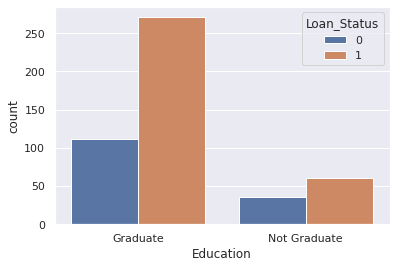

In [15]:
#relation between education and loan_status(target value)

sns.set()
sns.countplot(x= 'Education',hue='Loan_Status',data=df)
plt.show()

People who are graduate have higher chances of approved loans.

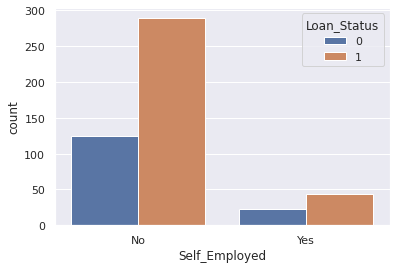

In [16]:
#relation between self_employed and loan_status(target value)

sns.set()
sns.countplot(x= 'Self_Employed',hue='Loan_Status',data=df)
plt.show()

People who are into jobs and have fixed incomes have high chances of approved loans as compared to self_employed people

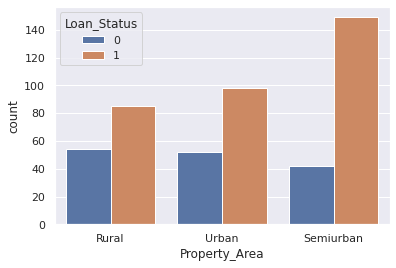

In [17]:
#relation between property area and loan_status(target value)

sns.set()
sns.countplot(x= 'Property_Area',hue='Loan_Status',data=df)
plt.show()

People whose property are located in semiurban and urban areas have high chances of approved loans.

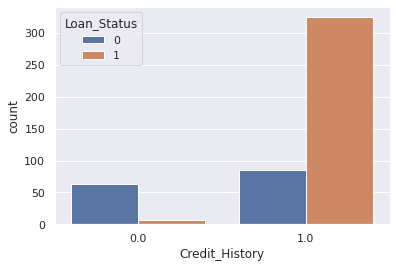

In [18]:
#relation between Credit history area and loan_status(target value)

sns.set()
sns.countplot(x= 'Credit_History',hue='Loan_Status',data=df)
plt.show()

People who have credit history of 1(means they have paid their previous debts on time) have higher chances of appoved loans.

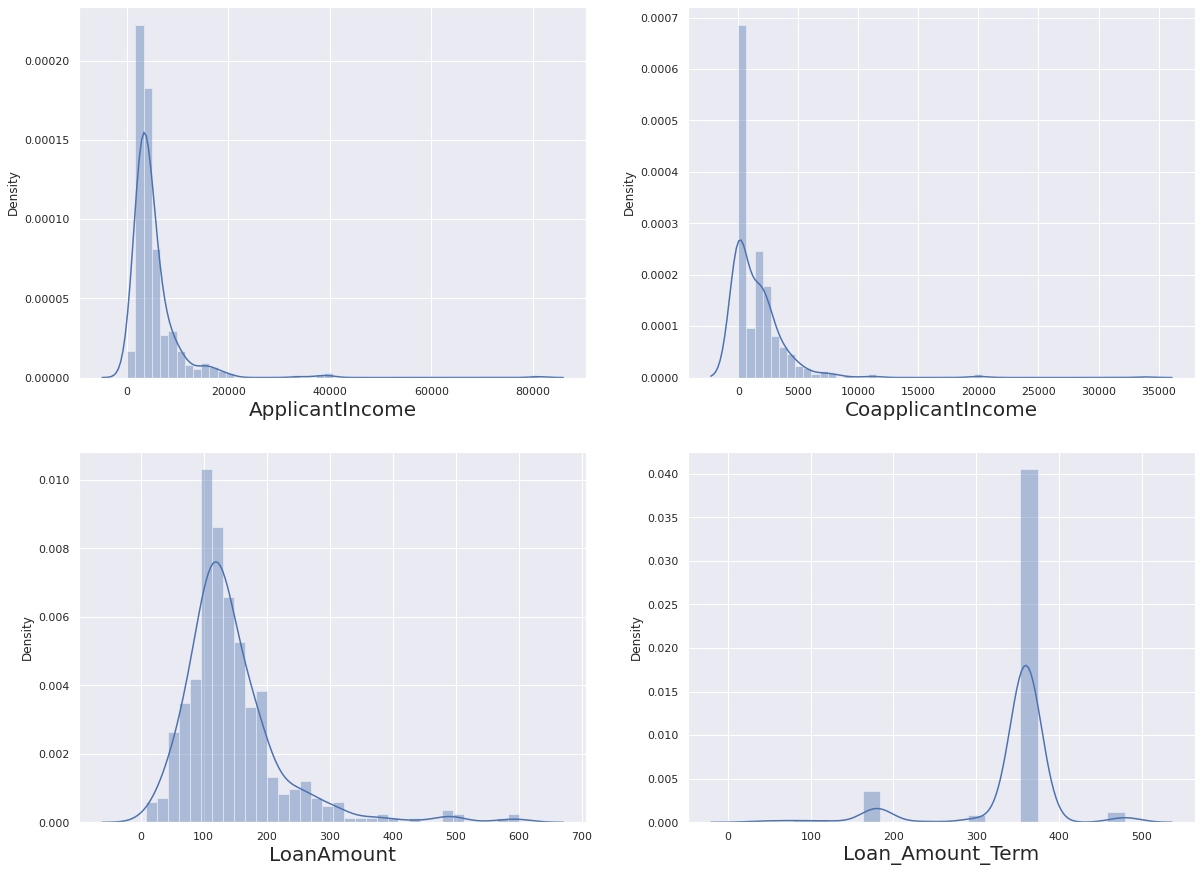

In [19]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
  if plotnumber <= 4:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)

    plotnumber +=1

plt.show()

The above continuous column shows skewness in data therefore they are not normallly distributed.

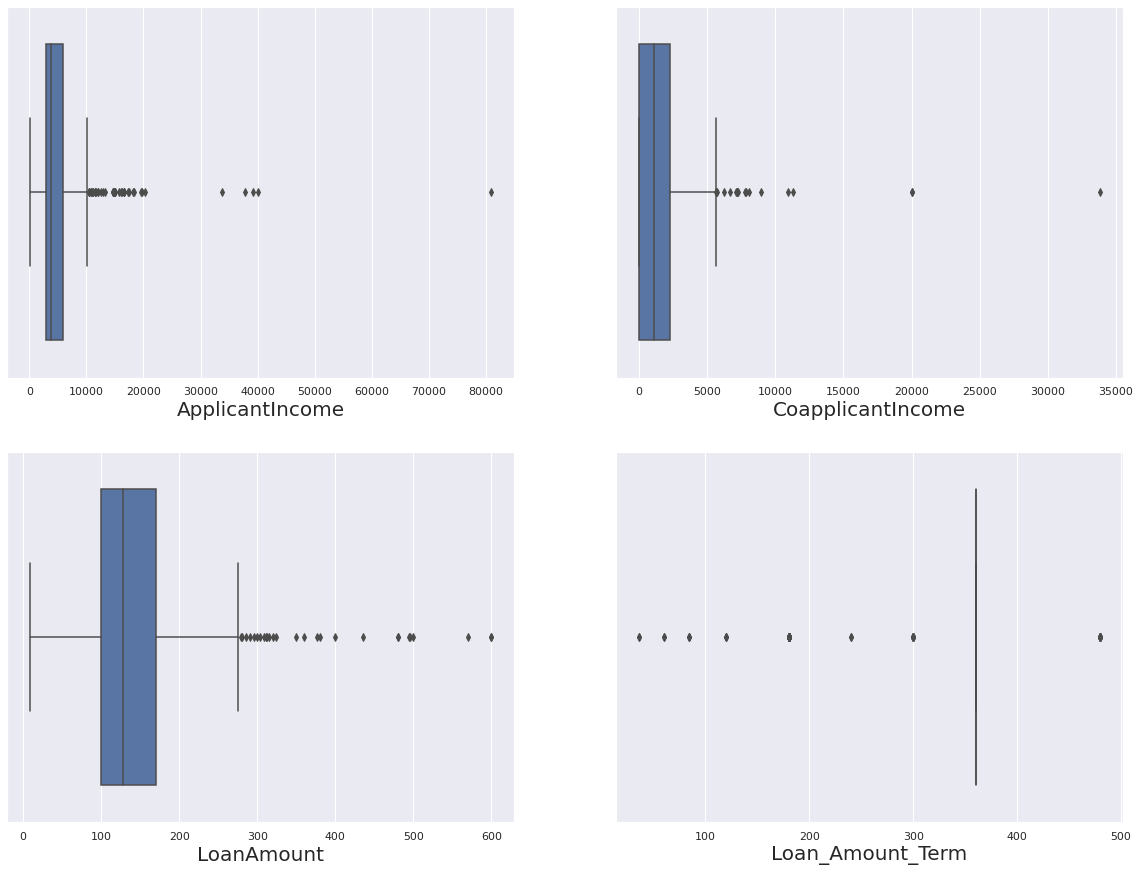

In [20]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
  if plotnumber <= 4:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)

    plotnumber +=1

plt.show()

The data set has outliers

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


#DATA PREPROCESSING

In [22]:
#removing outliers

q1=df.quantile(0.25)

q3=df.quantile(0.75)

iqr=q3=q1

In [23]:
#validating outlier
ApplicantIncome_high=(q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome))
print(ApplicantIncome_high)


#checking the indexes with higher values
index=np.where(df['ApplicantIncome']>ApplicantIncome_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()


7246.875
(array([  8,  16,  19,  26,  41,  45,  53,  69,  83,  87,  90,  95, 103,
       109, 111, 113, 117, 120, 121, 124, 127, 131, 142, 144, 146, 148,
       153, 154, 164, 166, 180, 191, 199, 203, 213, 220, 229, 244, 250,
       253, 254, 270, 271, 275, 286, 287, 289, 292, 302, 303, 314, 318,
       319, 331, 337, 342, 345, 347, 359, 360, 370, 372, 376, 377, 380,
       384, 396, 409, 410, 417, 434, 438, 441, 447, 464, 467, 471, 477,
       478]),)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
397,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
398,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
399,610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [24]:
#validating outlier
CoapplicantIncome_high=(q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome))
print(CoapplicantIncome_high)


#checking the indexes with higher values
index=np.where(df['CoapplicantIncome']>CoapplicantIncome_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()


0.0
(array([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,  15,  16,  17,
        18,  22,  23,  24,  25,  27,  28,  31,  32,  33,  37,  38,  39,
        40,  41,  43,  45,  46,  49,  50,  52,  54,  55,  56,  58,  60,
        61,  62,  63,  64,  65,  68,  69,  71,  72,  73,  74,  75,  76,
        78,  79,  81,  83,  84,  88,  90,  91,  92,  95,  96,  97,  98,
       100, 103, 104, 105, 106, 108, 111, 112, 113, 114, 115, 117, 118,
       126, 127, 129, 133, 136, 138, 139, 140, 141, 143, 144, 147, 149,
       150, 151, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166,
       170, 174, 175, 176, 177, 179, 180, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 193, 195, 196, 199, 200, 201, 203, 204, 205,
       206, 208, 210, 212, 213, 215, 216, 218, 220, 222, 224, 226, 227,
       228, 229, 231, 233, 234, 236, 237, 243, 244, 247, 251, 252, 254,
       255, 257, 258, 259, 262, 265, 269, 270, 273, 274, 275, 277, 278,
       281, 284, 286, 288, 289, 290, 292, 293, 294, 295, 29

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
1,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
2,15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1
3,17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
4,18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,1
153,602,LP002953,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
154,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
155,610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [25]:
#validating outlier
LoanAmount_high=(q3.LoanAmount + (1.5 * iqr.LoanAmount))
print(LoanAmount_high)


#checking the indexes with higher values
index=np.where(df['LoanAmount']>LoanAmount_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

250.0
(array([63]),)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
1,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
2,15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1
3,17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
4,18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,1
152,602,LP002953,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
153,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
154,610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [26]:
#validating outlier
Loan_Amount_Term_high=(q3.Loan_Amount_Term + (1.5 * iqr.Loan_Amount_Term))
print(Loan_Amount_Term_high)


#checking the indexes with higher values
index=np.where(df['Loan_Amount_Term']>Loan_Amount_Term_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

900.0
(array([], dtype=int64),)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
1,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
2,15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1
3,17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
4,18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,1
152,602,LP002953,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
153,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
154,610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [27]:
#validating outlier
Loan_Amount_Term_high=(q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
print(Loan_Amount_Term_high)


#checking the indexes with higher values
index=np.where(df['Loan_Amount_Term']<Loan_Amount_Term_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

-180.0
(array([], dtype=int64),)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
1,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
2,15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1
3,17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
4,18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,1
152,602,LP002953,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
153,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
154,610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


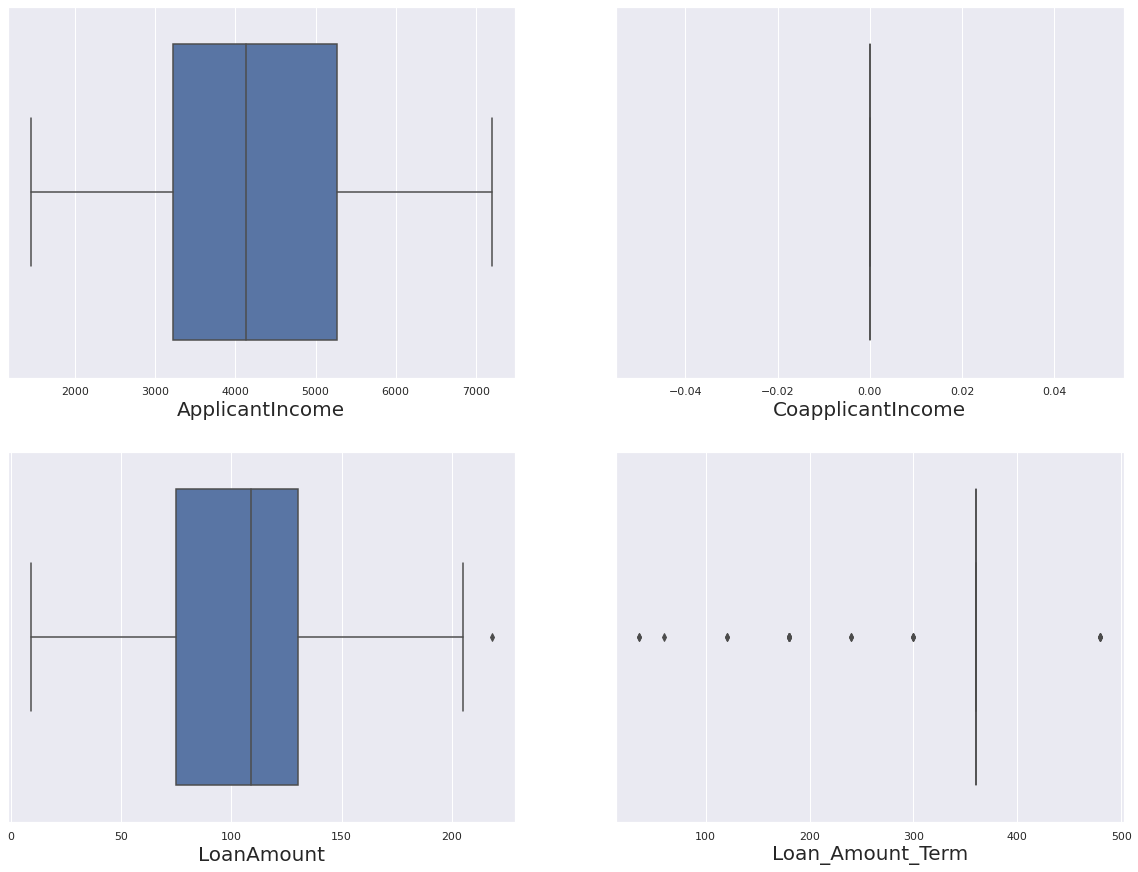

In [28]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
  if plotnumber <= 4:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)

    plotnumber +=1

plt.show()

In [29]:
#converting cateforical data into binary

df1=pd.get_dummies(df[['Gender','Married','Education','Self_Employed','Property_Area']])
df1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
2,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
15,0,1,1,0,1,0,1,0,0,0,1
17,1,0,1,0,1,0,1,0,0,0,1
18,0,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
599,0,1,0,1,1,0,1,0,0,0,1
602,0,1,0,1,1,0,1,0,0,0,1
609,1,0,1,0,1,0,1,0,1,0,0
610,0,1,0,1,1,0,1,0,1,0,0


In [30]:
df=df.join(df1)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,0,1,1,0,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,1,0,1,0,1,0,0,0,1
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,...,1,1,0,1,0,1,0,0,0,1
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,...,0,1,0,1,0,1,0,0,0,1
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,...,1,0,1,1,0,1,0,0,0,1
602,LP002953,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,...,1,0,1,1,0,1,0,0,0,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,...,0,1,0,1,0,1,0,1,0,0
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,...,1,0,1,1,0,1,0,1,0,0


In [32]:
df.drop(['Gender','Married','Self_Employed','Property_Area','Education'],inplace=True,axis=1)

In [33]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
15,LP001032,0,4950,0.0,125.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
17,LP001036,0,3510,0.0,76.0,360.0,0.0,0,1,0,1,0,1,0,1,0,0,0,1
18,LP001038,0,4887,0.0,133.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0,0


In [34]:
#separating features and target

X=df.drop(['Loan_ID','Loan_Status'],axis=True)
y=df['Loan_Status']

In [35]:
#checking the skewness of the data
df.skew().sort_values()

Loan_Amount_Term          -2.508556
Self_Employed_No          -2.245851
Credit_History            -2.008216
Education_Graduate        -1.334379
Gender_Male               -0.874655
Loan_Status               -0.593699
Married_No                -0.395746
CoapplicantIncome          0.000000
LoanAmount                 0.232070
Property_Area_Semiurban    0.314431
ApplicantIncome            0.371576
Married_Yes                0.395746
Gender_Female              0.874655
Property_Area_Urban        0.908473
Property_Area_Rural        0.978095
Education_Not Graduate     1.334379
Dependents                 1.585315
Self_Employed_Yes          2.245851
dtype: float64

In [36]:
#removing skewness from the data

from sklearn.preprocessing import power_transform


In [37]:
x=power_transform(X)

In [38]:
pd.DataFrame(x,columns=X.columns).skew().sort_values()

Self_Employed_No          -2.245851
Credit_History            -2.008216
Education_Graduate        -1.334379
Gender_Male               -0.874655
Married_No                -0.395746
ApplicantIncome           -0.025422
LoanAmount                -0.014614
CoapplicantIncome          0.000000
Loan_Amount_Term           0.257961
Property_Area_Semiurban    0.314431
Married_Yes                0.395746
Dependents                 0.677084
Gender_Female              0.874655
Property_Area_Urban        0.908473
Property_Area_Rural        0.978095
Education_Not Graduate     1.334379
Self_Employed_Yes          2.245851
dtype: float64

In [39]:
#checking the correlation of feature with label
X.corrwith(y).sort_values()

Property_Area_Rural       -0.124875
Gender_Female             -0.091109
Married_No                -0.071229
Loan_Amount_Term          -0.058836
Education_Not Graduate    -0.045997
Property_Area_Urban       -0.043583
Self_Employed_No          -0.007174
Self_Employed_Yes          0.007174
Education_Graduate         0.045997
LoanAmount                 0.053421
Married_Yes                0.071229
Gender_Male                0.091109
Property_Area_Semiurban    0.153966
ApplicantIncome            0.183248
Credit_History             0.480322
CoapplicantIncome               NaN
dtype: float64

Though Coapplicant has zero realtion with label but we are still keeping it.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#LOGISTIC REGRESSION

In [41]:
lr=LogisticRegression()

In [42]:
for i in range(0,1000):
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print('At random state',i,'the model performs well')
    print('At random state',i)
    print('Training accuracy of data is :-',accuracy_score(y_train,pred_train)*100)
    print('Testing accuracy of data is :-',accuracy_score(y_test,pred_test)*100)
    print('\n')
     
   

    

At random state 23 the model performs well
At random state 23
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 75 the model performs well
At random state 75
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 98 the model performs well
At random state 98
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 218 the model performs well
At random state 218
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 291 the model performs well
At random state 291
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 321 the model performs well
At random state 321
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 372 the model performs well
At random state 372
Training accuracy of data is :- 75.0
Testing accuracy of data is :- 75.0


At random state 614 the model per

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=992)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.81      0.91      0.86        23

    accuracy                           0.78        32
   macro avg       0.74      0.68      0.70        32
weighted avg       0.77      0.78      0.77        32



In [46]:
(53+86)/2

69.5

#CROSS VALIDATION(LOGISTIC REGRESSION)

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
pred_lr=lr.predict(x_test)

lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
  lsscore=cross_val_score(lr,X,y,cv=j)
  lsc=lsscore.mean()
  print('At cv:-',j)
  print('cross validation score is :-',lsc*100)
  print('accuracy score is:-',lss*100)
  print('\n')

At cv:- 2
cross validation score is :- 69.87179487179486
accuracy score is:- 78.125


At cv:- 3
cross validation score is :- 68.58974358974358
accuracy score is:- 78.125


At cv:- 4
cross validation score is :- 73.07692307692307
accuracy score is:- 78.125


At cv:- 5
cross validation score is :- 73.08467741935483
accuracy score is:- 78.125


At cv:- 6
cross validation score is :- 73.07692307692307
accuracy score is:- 78.125


At cv:- 7
cross validation score is :- 76.28458498023714
accuracy score is:- 78.125


At cv:- 8
cross validation score is :- 73.75
accuracy score is:- 78.125


At cv:- 9
cross validation score is :- 73.12999273783586
accuracy score is:- 78.125




In [49]:
lsscore_selected=cross_val_score(lr,X,y,cv=7).mean()
print('The cv score is ',lsscore_selected*100, '\n the accuracy score is ',lss*100)

The cv score is  76.28458498023714 
 the accuracy score is  78.125


In [50]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [54]:
grid=GridSearchCV(lr,param_grid=param_grid)

grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [55]:
print('best_params =>',grid.best_params_)

best_params => {'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [56]:
lr=grid.best_estimator_

In [57]:
lr.fit(x_train,y_train)

LogisticRegression(C=4.281332398719396)

In [58]:
lr_train_pred=lr.predict(x_train)

In [59]:
lr_test_pred=lr.predict(x_test)

In [60]:
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.81      0.91      0.86        23

    accuracy                           0.78        32
   macro avg       0.74      0.68      0.70        32
weighted avg       0.77      0.78      0.77        32



In [61]:
(53+86)/2

69.5

#DECISON TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier()

In [64]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
dt_train_pred=dt.predict(x_train)

In [66]:
dt_test_pred=dt.predict(x_test)

In [67]:
print(classification_report(y_train,dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        77

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [68]:
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.77      0.74      0.76        23

    accuracy                           0.66        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.67      0.66      0.66        32



In [69]:
(44+78)/2

61.0

#RANDOM FOREST CLASSIFIER

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
rf_train_pred=rf.predict(x_train)

In [74]:
rf_test_pred=rf.predict(x_test)

In [75]:
print(classification_report(y_train,rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        77

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [76]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.79      0.83      0.81        23

    accuracy                           0.72        32
   macro avg       0.65      0.64      0.64        32
weighted avg       0.71      0.72      0.71        32



In [77]:
(59+85)/2

72.0

#KNN CLASSIFIER

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn=KNeighborsClassifier()

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
knn_train_pred=knn.predict(x_train)

In [82]:
knn_test_pred=knn.predict(x_test)

In [83]:
print(classification_report(y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61        47
           1       0.76      0.82      0.79        77

    accuracy                           0.73       124
   macro avg       0.71      0.70      0.70       124
weighted avg       0.72      0.73      0.72       124



In [84]:
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.76      0.83      0.79        23

    accuracy                           0.69        32
   macro avg       0.59      0.58      0.58        32
weighted avg       0.67      0.69      0.67        32



In [85]:
(38+79)/2

58.5

#Cross validation report(RANDOM FOREST CLASSIFIER)



In [86]:
pred_rf=rf.predict(x_test)

lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
  lsscore=cross_val_score(rf,X,y,cv=j)
  lsc=lsscore.mean()
  print('At cv:-',j)
  print('cross validation score is :-',lsc*100)
  print('accuracy score is:-',lss*100)
  print('\n')

At cv:- 2
cross validation score is :- 72.43589743589743
accuracy score is:- 71.875


At cv:- 3
cross validation score is :- 66.66666666666666
accuracy score is:- 71.875


At cv:- 4
cross validation score is :- 69.87179487179486
accuracy score is:- 71.875


At cv:- 5
cross validation score is :- 74.35483870967742
accuracy score is:- 71.875


At cv:- 6
cross validation score is :- 71.15384615384616
accuracy score is:- 71.875


At cv:- 7
cross validation score is :- 72.44494635798982
accuracy score is:- 71.875


At cv:- 8
cross validation score is :- 73.68421052631578
accuracy score is:- 71.875


At cv:- 9
cross validation score is :- 72.40377632534496
accuracy score is:- 71.875




In [87]:
lsscore_selected=cross_val_score(rf,X,y,cv=9).mean()
print('The cv score is ',lsscore_selected*100, '\n the accuracy score is ',lss*100)

The cv score is  72.40377632534495 
 the accuracy score is  71.875


#HYPER PARAMETET TUNING

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters={'n_estimators':range(2,5),
            'criterion':['entropy','gini'],
            'max_depth':range(2,10),
            'min_samples_split': range(2,10),
            'min_samples_leaf':range(2,10)}

In [90]:
grid=GridSearchCV(rf,param_grid=parameters)

grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': range(2, 5)})

In [91]:
print('best_params =>',grid.best_params_)

best_params => {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 2}


In [92]:
rf=grid.best_estimator_

In [93]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=2)

In [94]:
rf_train_pred=rf.predict(x_train)

In [95]:
rf_test_pred=rf.predict(x_test)

In [96]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.81      0.96      0.88        23

    accuracy                           0.81        32
   macro avg       0.81      0.70      0.73        32
weighted avg       0.81      0.81      0.79        32



In [101]:
(57+88)/2

72.5

#ROC CURVE

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

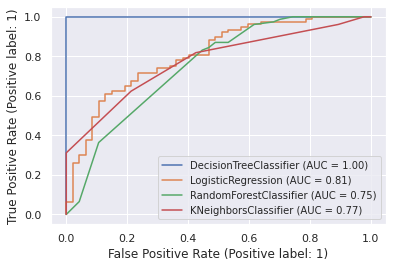

In [99]:

disp=plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')

plt.show()

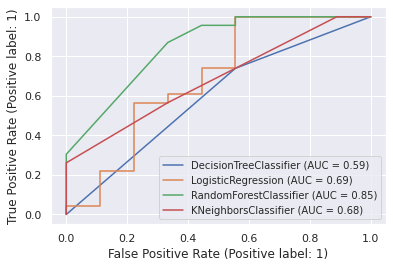

In [100]:

disp=plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')

plt.show()

#LOADING MODEL

In [102]:
import joblib

In [103]:
joblib.dump(rf,'loan-appication.obj')

['loan-appication.obj']

In [104]:
model=joblib.load('loan-appication.obj')

In [105]:
result=model.predict(x_test)

In [106]:
accuracy_score(y_test,result)

0.8125

In [107]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':result})

In [108]:
predicted_values

,Actual,Predicted
486,0,0
589,0,0
208,1,1
4,1,1
69,0,1
591,0,1
403,1,0
610,1,1
582,1,1
121,1,1


The random forest classifier model has 81% accuracy